In [40]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt

fileLoc = "/home/vamsi/Downloads/"  # The location where all the data is stored
data1 = pd.read_csv(fileLoc+'student-mat.csv')     # First data file
data2 = pd.read_csv(fileLoc+'student-por.csv')     # Second data file

data1.replace([np.inf, -np.inf], np.nan)
data2.replace([np.inf, -np.inf], np.nan)
data1.dropna()
data2.dropna()

# Filtering out few rows in dataframe
data1 =  data1.loc[~(data1['G3']==0)]
data2 =  data2.loc[~(data2['G3']==0)]


data1.dropna()
data2.dropna()

data = pd.concat([data1,data2])  # forming one data table



#check if need filling data



mod_data1 = data 

binaryYesNo = {'yes': 1, 'no': 0}
school_map  = {'MS': 1, 'GP': 2}
sex_map     = {'M': 1, 'F': 2}
address_map = {'R':1, 'U':2}
famsize_map = {'LE3':1, 'GT3':2}
pstatus_map = {'A':1, 'T':2}
mjob_map    = {'services' : 1, 'health' : 2, 'other' : 3, 'at_home' : 4, 'teacher' : 5}
fjob_map    = {'services' : 1, 'health' : 2,  'other' : 3,  'at_home' : 4, 'teacher' : 5}
reason_map   = {'course':1, 'other':2, 'reputation':3, 'home':4}
guardian_map = {'other':0, 'father':1, 'mother':1}
absences_map = {}
grades_map = {}

#absenties mapping

# mapping the no.  of absences into 5 categories of <=5,10, 20, 40, >40

for i in xrange((pd.DataFrame.max(data1))['absences']+1):
    if i<=5:
        absences_map[i] = 0
    elif i<=10:
        absences_map[i] = 1
    elif i<=20:
        absences_map[i] = 2
    elif i<=40:
        absences_map[i] = 3
    else:
        absences_map[i] = 4
        
#grade mapping
        
# max grade is 20

maxGrade = 20

for i in xrange(maxGrade+1):
    if i <= 5:
        grades_map[i] = 1
    elif i <= 9:
        grades_map[i] = 2
    elif i <= 11:
        grades_map[i] = 3
    elif i<= 13:
        grades_map[i] = 4
    elif i<= 15:
        grades_map[i] = 5
    else:
        grades_map[i] = 6
        

        
#grades_map = {i: if i<=5: 0 elif i <= 9: 1 elif i <= 11: 2 elif i <= 13: 3 elif i <= 15: 4 else: 5 for i in xrange(maxGrade)}

mod_data1.schoolsup  = mod_data1.schoolsup.map(binaryYesNo)
mod_data1.famsup     = mod_data1.famsup.map(binaryYesNo)
mod_data1.paid       = mod_data1.paid.map(binaryYesNo)
mod_data1.activities = mod_data1.activities.map(binaryYesNo)
mod_data1.nursery    = mod_data1.nursery.map(binaryYesNo)
mod_data1.higher     = mod_data1.higher.map(binaryYesNo)
mod_data1.internet   = mod_data1.internet.map(binaryYesNo)
mod_data1.romantic   = mod_data1.romantic.map(binaryYesNo)
mod_data1.school   = mod_data1.school.map(school_map)
mod_data1.sex      = mod_data1.sex.map(sex_map)
mod_data1.address  = mod_data1.address.map(address_map)
mod_data1.famsize  = mod_data1.famsize.map(famsize_map)
mod_data1.Pstatus  = mod_data1.Pstatus.map(pstatus_map)
mod_data1.Mjob     = mod_data1.Mjob.map(mjob_map)
mod_data1.Fjob     = mod_data1.Fjob.map(fjob_map)
mod_data1.reason   = mod_data1.reason.map(reason_map)
mod_data1.guardian = mod_data1.guardian.map(guardian_map)
mod_data1.absences = mod_data1.absences.map(absences_map)
mod_data1.G1       = mod_data1.G1.map(grades_map)
mod_data1.G2       = mod_data1.G2.map(grades_map)
mod_data1.G3       = mod_data1.G3.map(grades_map)

#mod_data1.head()


from sklearn.linear_model import LinearRegression


## Grades 
lm2 = LinearRegression()
X1 = mod_data1.drop('G1',axis =1)
X2 = X1.drop('G2',axis =1)
X = X2.drop('G3',axis =1)
X = X.assign(constant= 1)
lm2.fit(X,mod_data1.G3)
variables2 = pd.DataFrame(zip(X.columns, lm2.coef_),columns = ['variables', 'estimated_Coefficients'])
variables2['absolutevalues'] = abs(variables2['estimated_Coefficients'])
mod_var2 = variables2.sort_values(by = ['absolutevalues'],ascending = False)
print list(X)

print mod_var2

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'constant']
     variables  estimated_Coefficients  absolutevalues
15   schoolsup               -0.780319        0.780319
20      higher                0.598286        0.598286
17        paid               -0.475603        0.475603
14    failures               -0.443811        0.443811
0       school                0.308725        0.308725
29    absences               -0.288915        0.288915
21    internet                0.167431        0.167431
18  activities                0.145621        0.145621
6         Medu                0.141505        0.141505
13   studytime                0.139826        0.139826
1          sex                0.125000        0.125000
16      famsup    

### Impact of Higher Education

1
<type 'float'>
<type 'float'>


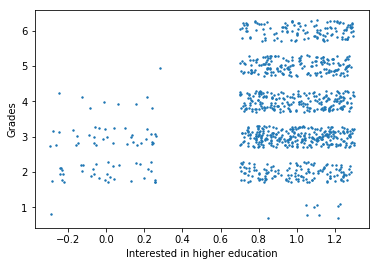

In [31]:
### Plotting linear regressor for top vairables like sex, go-out 
# select the variables and plot
import random

higher = mod_data1['higher'].tolist()
grades =    mod_data1['G3'].tolist()
#print type(grades[0])
print higher[0]
for i in range(len(higher)):
        higher[i] = random.uniform((higher[i]-0.3),(higher[i]+0.3))
        grades[i] = random.uniform((grades[i]-0.3),(grades[i]+0.3))
print(type(higher[0]))        

print type(grades[0])
plt.scatter(higher,grades,s=2,alpha=1)
#plt.scatter(dataWalcF,dataDalcF,c='red',s=5,alpha=0.25)
#plt.scatter(mod_data1.higher,mod_data1.G3)
plt.xlabel('Interested in higher education')
plt.ylabel('Grades')
plt.show()

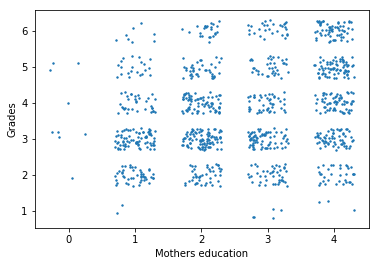

In [41]:
meducation = mod_data1['Medu'].tolist()
grades =    mod_data1['G3'].tolist()
#print type(grades[0])
for i in range(len(higher)):
        meducation[i] = random.uniform((meducation[i]-0.3),(meducation[i]+0.3))
        grades[i] = random.uniform((grades[i]-0.3),(grades[i]+0.3))

plt.scatter(meducation,grades,s=2,alpha=1)
#plt.scatter(dataWalcF,dataDalcF,c='red',s=5,alpha=0.25)
#plt.scatter(mod_data1.higher,mod_data1.G3)
plt.xlabel('Mothers education')
plt.ylabel('Grades')
plt.show()